### Airbnb Housing Prices Prediction 

In [80]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from numpy import absolute
import numpy as np
from numpy import mean

In [46]:
# Load training data set
df_train= pd.read_csv('AirbnbTrain.csv')
# Load testing data set
df_test = pd.read_csv('AirbnbTest.csv')

In [47]:
df_train.head()

,latitude,longitude,Entire home,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price
0,34.103701,-118.332241,1,13,2.0,3,2,150,2,1,100,1,350
1,34.099484,-118.331645,1,8,2.0,2,4,150,1,11,96,1,190
2,34.104321,-118.329662,1,4,1.0,0,1,55,1,1,80,0,85
3,34.101028,-118.317848,0,2,1.0,1,1,20,1,8,98,0,75
4,34.098292,-118.324980,1,2,1.0,1,1,20,1,11,96,0,130


In [48]:
df_test.head()

,latitude,longitude,Entire home,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price
0,34.100604,-118.341787,0,2,1.0,1,1,40,1,261,96,1,100
1,34.100607,-118.350583,1,8,2.0,2,2,100,2,10,98,0,300
2,34.100610,-118.347617,1,2,1.0,1,1,80,2,1,100,1,125
3,34.100611,-118.342180,1,3,1.0,0,2,55,2,54,97,1,169
4,34.100618,-118.342791,1,4,1.0,1,1,70,2,233,92,1,119


In [49]:
# Splitting Data into x and y 
x = df_train.drop(columns= 'price')
y = df_train['price']
x_test = df_test.drop(columns= 'price')
y_test =  df_test['price']

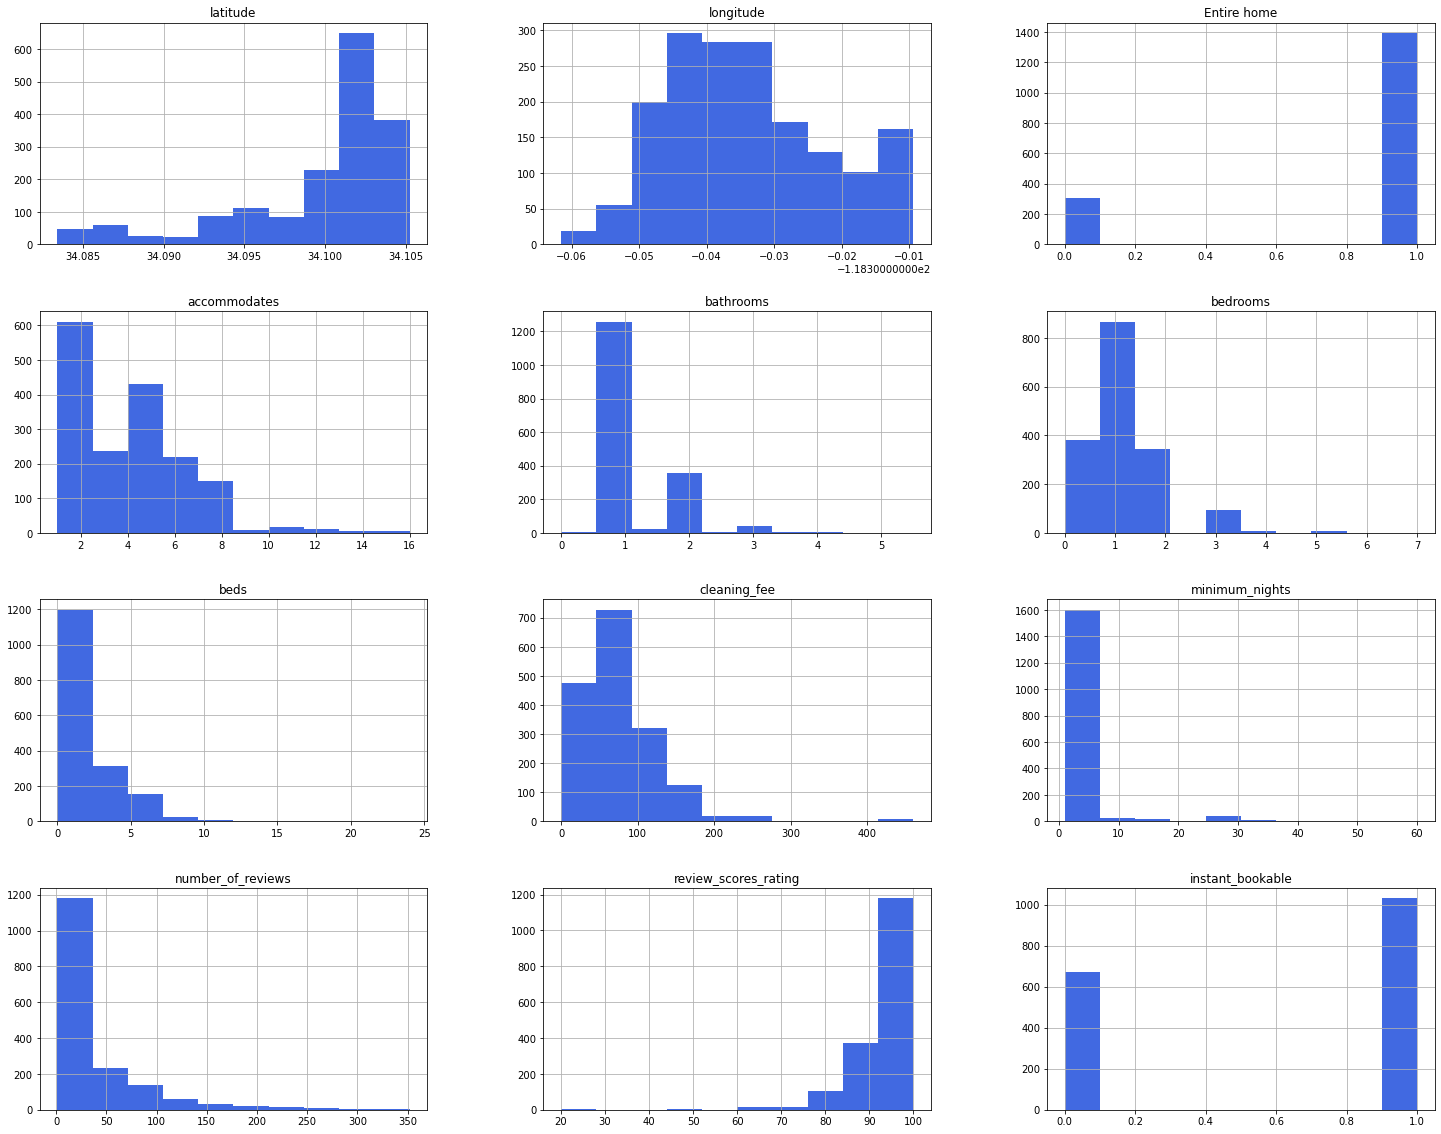

In [50]:
# Data Exploratory for X Variable
x.hist(figsize = (25,20), color='RoyalBlue')
plt.show()

(0.0, 600.0)

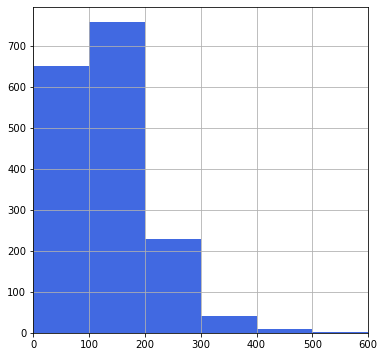

In [51]:
# Data Exploratory for Y Variable
y.hist(figsize = (6,6), color='RoyalBlue',bins=20)
plt.xlim(0,600)

In [52]:
# Data Exploratory for X Variable
x.describe()

,latitude,longitude,Entire home,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,34.099711,-118.334020,0.818824,3.978824,1.292353,1.118235,2.245882,74.559412,2.815882,36.219412,92.871765,0.605882
std,0.004980,0.011726,0.385278,2.292249,0.557046,0.867718,1.829588,52.007940,5.517449,50.783103,8.694679,0.488804
min,34.083418,-118.361549,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,0.000000
25%,34.098312,-118.342887,1.000000,2.000000,1.000000,1.000000,1.000000,40.000000,1.000000,5.000000,90.000000,0.000000
50%,34.101492,-118.335496,1.000000,4.000000,1.000000,1.000000,2.000000,70.000000,1.000000,14.000000,95.000000,1.000000
75%,34.102889,-118.325845,1.000000,5.000000,1.500000,2.000000,3.000000,99.000000,2.000000,47.000000,98.000000,1.000000
max,34.105243,-118.309413,1.000000,16.000000,5.500000,7.000000,24.000000,460.000000,60.000000,352.000000,100.000000,1.000000


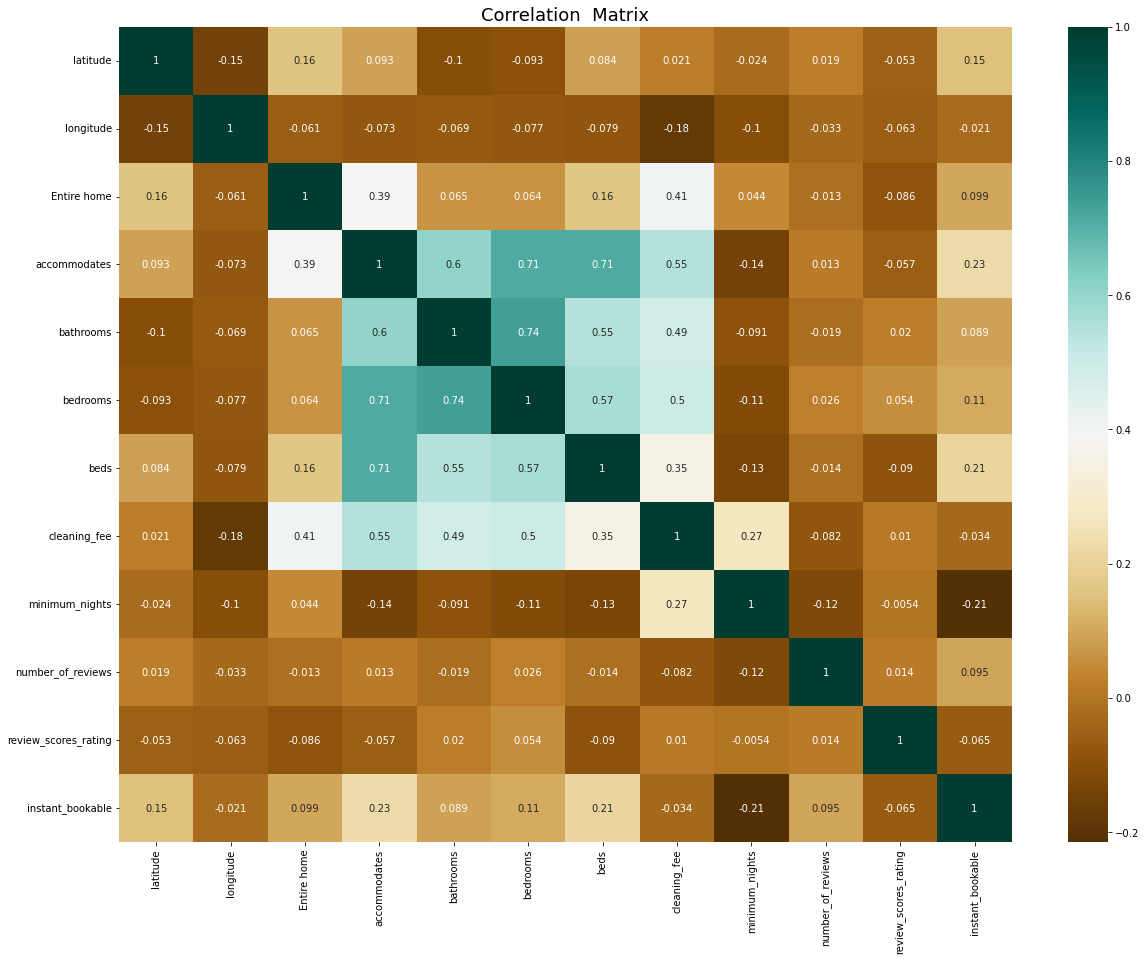

In [53]:
# Create a Correlation Matrix
corr_matrix = x.corr()
f, ax1 = plt.subplots(figsize=(20, 15))
ax1.set_title('Correlation  Matrix', fontsize = 18)
ax1 = sns.heatmap(data=corr_matrix, annot= True, cmap = 'BrBG')

In [54]:
# Split Numerical and Categorical Columns
from sklearn.preprocessing import StandardScaler
cols_name = x.columns.values.tolist()
categorical_cols = ['Entire home', 'instant_bookable']
non_categorical_cols = [i for i in cols_name if i not in categorical_cols]

In [62]:
# Standardization on Numerical Data 
x_non_cat_cols = x[non_categorical_cols]
scaler = StandardScaler().fit(x_non_cat_cols)
x_train_non_cat_scaled = pd.DataFrame(scaler.transform(x_non_cat_cols), columns = non_categorical_cols)

# test data
x_non_cat_cols_test = x_test[non_categorical_cols]
x_test_non_cat_scaled = pd.DataFrame(scaler.transform(x_non_cat_cols_test), columns = non_categorical_cols)

In [67]:
cat_cols_name_test = x_test_cat_cols.columns.values.tolist()
cat_cols_name_test

['Entire home', 'instant_bookable']

In [73]:
# Calling Categorical Data
x_cat_cols = x[categorical_cols]
x_test_cat_cols = x_test[categorical_cols]

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encoder = OneHotEncoder(drop='first')
encoder_df = pd.DataFrame(encoder.fit_transform(x_cat_cols).toarray())
cat_cols_name = x_cat_cols.columns.values.tolist()
cat_cols_name_test = x_test_cat_cols.columns.values.tolist()
encoder_df.columns = encoder.get_feature_names(cat_cols_name)
encoder_df_test.columns = encoder.get_feature_names(cat_cols_name_test)

In [74]:
# Concat Numerical and Categorical Data
X = pd.concat([x_train_non_cat_scaled, encoder_df], axis = 1)
X_test = pd.concat([x_test_non_cat_scaled, encoder_df_test], axis = 1)

In [58]:
#Train Test/Val Split 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
#Define and fit Decision Tree Regressor  
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 1)
dt.fit(X_train, y_train)
# Predict Valeu bases on fitted model 
y_pred = dt.predict(X_val)

# Loss Function for Decision Tree Regressor 
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 28.584313725490198
Mean Squared Error: 4161.301960784313
Root Mean Squared Error: 64.50815421932575


In [60]:
#Cross Validation Score 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, scoring='neg_mean_squared_error',cv=10)
mean(absolute(scores))

4520.611764705882

In [86]:
#Define and fit Random Forest Regressor  
from sklearn.ensemble import RandomForestRegressor
dt2 = RandomForestRegressor(random_state=0)
dt2.fit(X_train, y_train)
# Predict Valeu bases on fitted model 
y_pred2 = dt2.predict(X_val)

# Loss Function for Random Forest Regressor 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred2)))
print('R Square:', metrics.r2_score(y_val, y_pred2))
print('Adjusted R Square:', 1 - (1-metrics.r2_score(y_val, y_pred2))*(len(y_val)-1)/(len(y_val)-X.shape[1]-1))

Mean Absolute Error: 23.006529411764703
Mean Squared Error: 2014.295524117647
Root Mean Squared Error: 44.88090378008944
R Square: 0.8131389644825119
Adjusted R Square: 0.8086272292185082


In [31]:
#Cross Validation Score 
scores = cross_val_score(dt2, X, y, scoring='neg_mean_squared_error',cv=10)
mean(absolute(scores))

2436.190747176471

In [85]:
#Define and fit xgboost
import xgboost as xgb
dt3 = xgb.XGBRegressor(random_state=0)
dt3.fit(X_train, y_train)
# Predict Valeu bases on fitted model 
y_pred3 = dt3.predict(X_val)

# Loss Function for xgboost
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred3)))
print('R Square:', metrics.r2_score(y_val, y_pred3))
print('Adjusted R Square:', 1 - (1-metrics.r2_score(y_val, y_pred3))*(len(y_val)-1)/(len(y_val)-X.shape[1]-1))

Mean Absolute Error: 20.918744734221814
Mean Squared Error: 1602.9271498195715
Root Mean Squared Error: 40.036572653257565
R Square: 0.8513005547159788
Adjusted R Square: 0.8477102260572097


In [32]:
#Cross Validation Score 
scores = cross_val_score(dt3, X, y, scoring='neg_mean_squared_error',cv=10)
mean(absolute(scores))

2062.0089088352793

In [84]:
# Check on Test Data 
y_pred_test = dt3.predict(X_test)

# Loss Function for xgboost
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R Square:', metrics.r2_score(y_test, y_pred_test))
print('Adjusted R Square:', 1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X.shape[1]-1))

Mean Absolute Error: 7.472524176339735
Mean Squared Error: 351.1006518087536
Root Mean Squared Error: 18.737680000703225
R Square: 0.9610856011050155
Adjusted R Square: 0.9604048827569983


In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Creating Grid Dictionary 
param_grid = {
     'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# Creating Grid Search CV on Random Forest Regressor 
grid_search = RandomizedSearchCV(estimator = dt2, scoring='neg_mean_squared_error',  param_distributions = param_grid, cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

# Print Best Random Forest Parameters's MSE 
absolute(grid_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


5409.957048412528

In [40]:
#Print Best Hyperparameter
#print ('Best Parameters', grid_search.best_params_)
RF_best = grid_search.best_estimator_
RF_best

RandomForestRegressor(max_depth=50, min_samples_leaf=2, n_estimators=600,
                      random_state=0)

In [41]:
y_best_preds = RF_best.predict(X_val)

In [42]:
# Loss Function for Random Forest after HypaerParameters Tuning 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_best_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_best_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_best_preds)))

Mean Absolute Error: 23.892017054849653
Mean Squared Error: 1985.3323824441318
Root Mean Squared Error: 44.55706882688909


In [44]:
#Cross Validation Score 
scores = cross_val_score(RF_best, X, y, scoring='neg_mean_squared_error',cv=10)
mean(absolute(scores))

2862.9873598506556

Text(0.5, 0, 'Random Forest Feature Importance')

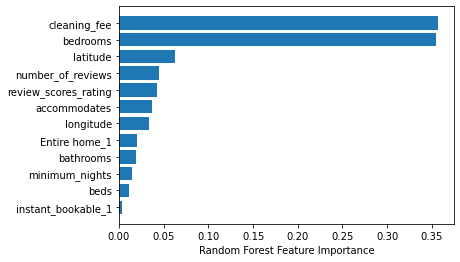

In [43]:
# Feature Importance 
sorted_idx = RF_best.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF_best.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")